## ML 과제

과제할 때 꿀팁!

1. 이전 세션들에서의 자료를 찾아본다.
2. 질문방에 질문한다.
3. 구글링한다.
4. 복붙하지 않고 직접 타이핑해서 코드를 완성한다.

In [110]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings(action='ignore')

### 0. Titanic 데이터 로드 및 훓어보기

In [111]:
# 여러분이 이전 과제로 만드셨을 FE를 진행한 데이터 보다는 원본 데이터가 조금 더 이번 실습에 적합하기 때문에 원본을 사용하겠습니다.
# 데이터를 로드하고, 잘 불러와진 것인지 첫 5행을 불러와 확인해보세요.

titanic = pd.read_csv('titanic.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [112]:
# 변수들의 데이터 타입, 결측치, target의 imbalance 여부를 확인해주세요.

display(titanic.info(null_counts = True))
display(titanic.isnull().sum())
display(titanic.groupby('Survived').size())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


None

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Survived
0    549
1    342
dtype: int64

In [113]:
# 편의상 결측치 데이터 및 승객 고유의 데이터('PassengerId','Name', 'Ticket', 'Cabin')는 모두 drop 시킵시다.
# 실제 프로젝트에서는 이렇게 하시면 성능이 낮을 수 있어요!!

drop_col = ['PassengerId','Name', 'Ticket', 'Cabin']
titanic = titanic.drop(columns=drop_col)

In [116]:
titanic.dropna(inplace=True)

In [117]:
display(titanic.info(null_counts = True))
display(titanic.isnull().sum())
display(titanic.groupby('Survived').size())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  712 non-null    int64  
 1   Pclass    712 non-null    int64  
 2   Sex       712 non-null    object 
 3   Age       712 non-null    float64
 4   SibSp     712 non-null    int64  
 5   Parch     712 non-null    int64  
 6   Fare      712 non-null    float64
 7   Embarked  712 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 50.1+ KB


None

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

Survived
0    424
1    288
dtype: int64

In [118]:
# categorical feature(Sex, Embarked)에 대해 LabelEncoding을 진행해 주세요.
# 전처리 완료된 DataFrame을 첫 5행을 불러와 확인해보세요

titanic = pd.get_dummies(titanic, columns = ["Sex","Embarked"])

### 1. Train-Test split & 종속변수-설명변수 분할

In [119]:
# 분할을 위해 필요한 적절한 패키지를 불러와주세요 
# train-test split 및 종속변수-설명변수 분할을 진행해주세요

from sklearn.model_selection import train_test_split

y = titanic.Survived
X = titanic.drop('Survived', axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42) 

### 2. Decision Tree를 통한 Classification

In [162]:
# Decision Tree에서 categorical feature인 'Pclass'를 기준으로 첫 번째 Node(Root Node)가 분리된다고 가정합시다.
# 이 때 Entropy 지표를 통해 Information Gain을 계산할 수 있는 함수(또는 코드)를 작성하고, Information gain을 계산하세요.
# 실습에서 다루지 않은 내용입니다. 코드가 어려우시다면 줄글로만 풀이과정을 작성해주셔도 됩니다.

# titanic data로 Pclass를 분리기준으로 이용했을 때의 entropy를 계산하는 상황만 고려하시면 됩니다.
# 계산에 사용할 데이터는 분할 이전의 0번에서 전처리 완료한 데이터를 기준으로 하겠습니다!
# 올바르게 계산할 시 Information Gain은 0.0097이 나옵니다.


########################################

# https://m.blog.daum.net/geoscience/1312 참고 했습니다.
# 맞는 함수 같은데 답이 전혀 틀리네요...ㅠㅠ죄송합니다 잘 모르겠습니당

########################################

target = titanic["Survived"]

# 엔트로피
def entropy(target_col):
    elements, counts = np.unique(target_col, return_counts = True)
    entropy = -np.sum([(counts[i]/np.sum(counts))*np.log2(counts[i]/np.sum(counts)) for i in range(len(elements))])
    return entropy

print('Entropy:', entropy(target))

# 정보이득
def InfoGain(data,split_attribute_name,target_name):
 
    # 전체 엔트로피 계산
    total_entropy = entropy(data[target_name])
    
    # 가중 엔트로피 계산
    vals,counts= np.unique(data[split_attribute_name],return_counts=True)
    Weighted_Entropy = np.sum([(counts[i]/np.sum(counts))*
                               entropy(data.where(data[split_attribute_name]==vals[i]).dropna()[target_name])
                               for i in range(len(vals))])
 
    
    # 정보이득 계산
    Information_Gain = total_entropy - Weighted_Entropy
    return Information_Gain


print('InfoGain:', InfoGain(titanic, "Pclass", "Survived"))

Entropy: 0.9735190023846809
InfoGain: 0.09400998456880605


##### <b>줄글 답안</b>
>

In [122]:
# Decision Tree 모델을 사용하기 위한 적절한 패키지를 불러와 주세요
# 별 다른 parameter 설정 없이 객체를 만들어 주고, 학습을 진행하세요

from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier() 
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier()

### 3. Graphviz를 통한 시각화

graphviz 설치를 하지 않으셨거나 오류가 난다면 이 부분은 건너뛰셔도 좋습니다

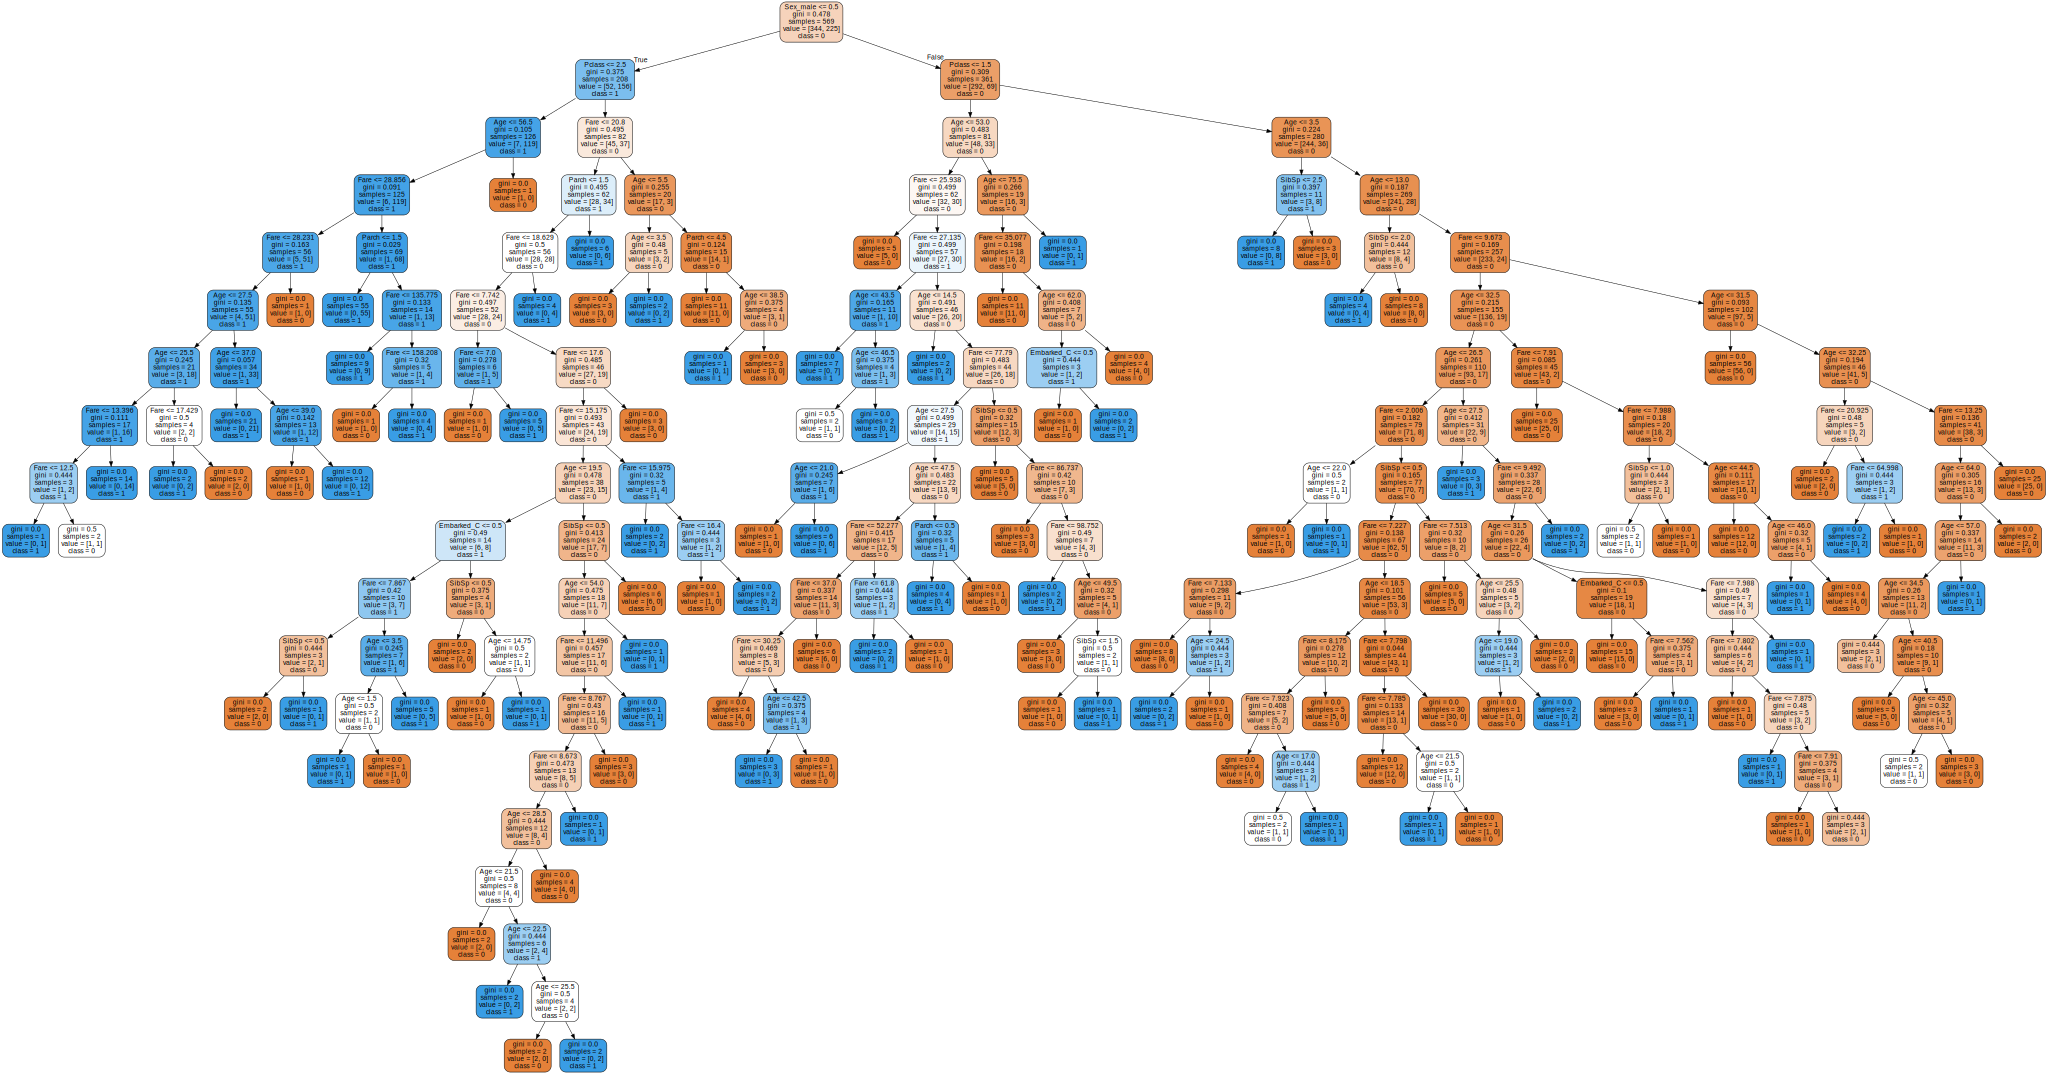

In [131]:
from sklearn.tree import export_graphviz

export_graphviz(dt_clf ,
                out_file=("titanic_hw.dot"),
                feature_names=X_train.columns,
                class_names=['0','1'],
                rounded=True,
                filled=True)

import graphviz
import os

os.environ["PATH"]+=os.pathsep+'C:/Program Files/Graphviz/bin'

with open("titanic_hw.dot") as f:
    dot_graph = f.read()
    display(graphviz.Source(dot_graph))

### 4. 결과 확인

In [133]:
# accuracy, f1 score, roc_auc score, confusion matrix, classification report를 모두 불러와주세요
# 불러온 metric(결과 확인 지표)들을 통해 결과를 확인해주세요.

from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix, classification_report

prediction = dt_clf.predict(X_test)

print('Accuracy:: {}'.format(accuracy_score(y_test, prediction)))
print('--------------------------------------------------------')
print('F1_Score:: {}'.format(f1_score(y_test, prediction)))
print('--------------------------------------------------------')
print('ROC_AUC_Score:: {}'.format(roc_auc_score(y_test, prediction)), sep = '\n')
print('--------------------------------------------------------')
matrix = confusion_matrix(y_test, prediction)
display(matrix)
print('--------------------------------------------------------')
print( classification_report(y_test, prediction) )

Accuracy:: 0.7062937062937062
--------------------------------------------------------
F1_Score:: 0.6440677966101694
--------------------------------------------------------
ROC_AUC_Score:: 0.6953373015873016
--------------------------------------------------------


array([[63, 17],
       [25, 38]], dtype=int64)

--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.72      0.79      0.75        80
           1       0.69      0.60      0.64        63

    accuracy                           0.71       143
   macro avg       0.70      0.70      0.70       143
weighted avg       0.70      0.71      0.70       143



### 5. GridSearch를 통한 Tree pruning

In [144]:
# GridSearch를 위한 적절한 패키지를 불러와 주세요
# max_leaf_nodes를 제외한 3가지 이상의 parameter에 대한 GridSearch를 진행해주세요. scoring은 원하시는 지표로 하셔도 됩니다.

from sklearn.model_selection import GridSearchCV
grid_dt = DecisionTreeClassifier()

criterion = ['gini', 'entropy'] 
max_depth = [6, 8, 10, 12, 16, 20, 24]
max_leaf_nodes = [16,20,24]
min_samples_split = [16, 24]

parameter_grid = {'criterion': criterion,
                    'max_depth': max_depth,
                    'max_leaf_nodes': max_leaf_nodes,
                     'min_samples_split' : min_samples_split}

gs = GridSearchCV(estimator= grid_dt, param_grid= parameter_grid, scoring= 'f1') 

gs.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [6, 8, 10, 12, 16, 20, 24],
                         'max_leaf_nodes': [16, 20, 24],
                         'min_samples_split': [16, 24]},
             scoring='f1')

In [145]:
# 최적 parameter 조합 / Validation score / Test score를 확인해 주세요.

# gridsearch의 method중 .best_params, .best_score_가 있습니다. 각각 최적 parameter 조합과 해당 조합의 최고 성능을 나타냅니다

print('최적 parameter 조합: {}'.format(gs.best_params_),
      '최고 Validation Score: {:.3f}'.format(gs.best_score_),
      'Test score: {:.3f}'.format(gs.score(X_test, y_test)), sep='\n')

최적 parameter 조합: {'criterion': 'gini', 'max_depth': 6, 'max_leaf_nodes': 16, 'min_samples_split': 16}
최고 Validation Score: 0.743
Test score: 0.640


In [146]:
## GridSearch에 사용하신 parameter는 Decision Tree 모델 학습에서 어떤 역할을 하는지 간단하게 요약해주세요.
## ex) criterion은 decision tree의 분류 기준인 불순도 지표를 정한다.
## hint) Shift+tab


# max_depth: 트리의 최대 깊이
# max_leaf_nodes: 리프노드의 최대 개수
# min_samples_split: 노드를 분할하기 위한 최소한의 샘플 데이터

> ### <b>고생하셨습니다~</b>

생각보다 GridSearch의 결과가 안 좋게 나와서 이상하다 생각하신 분들도 있을 수 있습니다. GridSearch 특성상 기존에 정해준 parameter 범위 내에서 찾는 것이기 때문에 애초에 적절한 parameter 후보를 찾지 못했다면 성능이 안 좋을 수도 있습니다. 앞으로 여러 프로젝트 진행해보시면서, parameter 찾는 것에 대한 감도 스스로 익혀보시면 좋을 것 같습니다!